In [49]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
plt.style.use('fivethirtyeight')

In [33]:
df = pd.read_csv('data/Train.csv')
column_list = df.columns

/Users/lazarus/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
print(df.head())
print(df.describe())
print(df.info())

   SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246      66000     999089     3157         121           3.0      2004   
1  1139248      57000     117657       77         121           3.0      1996   
2  1139249      10000     434808     7009         121           3.0      2001   
3  1139251      38500    1026470      332         121           3.0      2001   
4  1139253      11000    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand         saledate        ...         \
0                      68.0       Low  11/16/2006 0:00        ...          
1                    4640.0       Low   3/26/2004 0:00        ...          
2                    2838.0      High   2/26/2004 0:00        ...          
3                    3486.0      High   5/19/2011 0:00        ...          
4                     722.0    Medium   7/23/2009 0:00        ...          

  Undercarriage_Pad_Width Stick_Length Thumb Pattern_Cha

In [35]:
for column in column_list:
    print(column, len(df[column].unique()))

SalesID 401125
SalePrice 899
MachineID 341027
ModelID 5218
datasource 5
auctioneerID 31
YearMade 72
MachineHoursCurrentMeter 15153
UsageBand 4
saledate 3919
fiModelDesc 4999
fiBaseModel 1950
fiSecondaryDesc 176
fiModelSeries 129
fiModelDescriptor 140
ProductSize 7
fiProductClassDesc 74
state 53
ProductGroup 6
ProductGroupDesc 6
Drive_System 5
Enclosure 7
Forks 3
Pad_Type 5
Ride_Control 4
Stick 3
Transmission 9
Turbocharged 3
Blade_Extension 3
Blade_Width 7
Enclosure_Type 4
Engine_Horsepower 3
Hydraulics 13
Pushblock 3
Ripper 5
Scarifier 3
Tip_Control 4
Tire_Size 18
Coupler 4
Coupler_System 3
Grouser_Tracks 3
Hydraulics_Flow 4
Track_Type 3
Undercarriage_Pad_Width 20
Stick_Length 30
Thumb 4
Pattern_Changer 4
Grouser_Type 4
Backhoe_Mounting 3
Blade_Type 11
Travel_Controls 8
Differential_Type 5
Steering_Controls 6


In [36]:
data_list=[]
for column in column_list:
   temp_series = df[column].unique()
   data_list.append(temp_series)
d = dict(zip(column_list, data_list))
df2 = pd.DataFrame.from_dict(d, orient='index')
unique = df2.transpose()
print(unique)

            SalesID SalePrice MachineID ModelID datasource auctioneerID  \
0           1139246     66000    999089    3157        121            3   
1           1139248     57000    117657      77        132            1   
2           1139249     10000    434808    7009        136            2   
3           1139251     38500   1026470     332        149           11   
4           1139253     11000   1057373   17311        172            4   
5           1139255     26500   1001274    4605       None            7   
6           1139256     21000    772701    1937       None           99   
7           1139261     27000    902002    3539       None            6   
8           1139272     21500   1036251   36003       None            5   
9           1139275     65000   1016474    3883       None           18   
10          1139278     24000   1024998    5255       None           17   
11          1139282     22500    319906    2232       None           22   
12          1139283     3

In [47]:
df['saleyear'] = df['saledate'].str[-9:-4].astype('int32')
df['age'] = df['saleyear'] - df['YearMade']



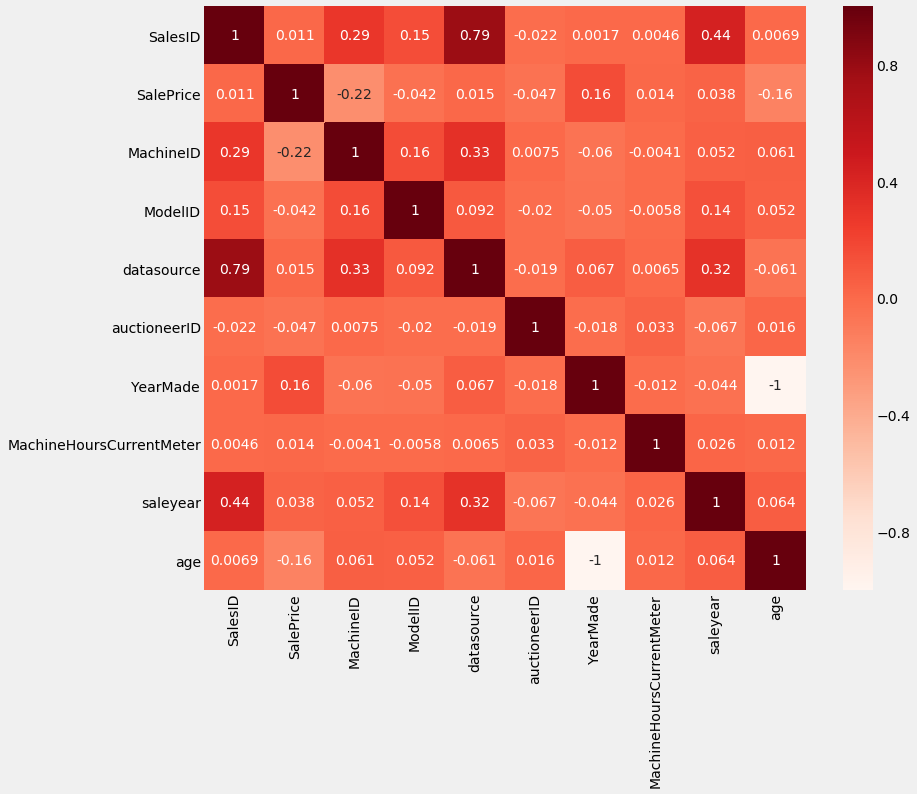

In [48]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [44]:
# df['age'] = 
pd.to_datetime(df['saledate'])

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
5        2008-12-18
6        2004-08-26
7        2005-11-17
8        2009-08-27
9        2007-08-09
10       2008-08-21
11       2006-08-24
12       2005-10-20
13       2006-01-26
14       2006-01-03
15       2006-11-16
16       2007-06-14
17       2010-01-28
18       2006-03-09
19       2005-11-17
20       2006-05-18
21       2006-10-19
22       2007-10-25
23       2006-10-19
24       2004-05-20
25       2006-03-09
26       2006-03-09
27       2007-02-22
28       2007-08-09
29       2006-06-01
            ...    
401095   2011-12-14
401096   2011-09-15
401097   2011-10-28
401098   2011-08-16
401099   2011-12-14
401100   2011-08-16
401101   2011-12-14
401102   2011-08-16
401103   2011-09-15
401104   2011-08-16
401105   2011-10-25
401106   2011-08-16
401107   2011-09-15
401108   2011-08-16
401109   2011-08-16
401110   2011-09-15
401111   2011-10-25
401112   2011-10-25
401113   2011-10-25


pandas.core.series.Series